In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Tensorflow

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\dinyz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Importing the data

In [3]:
data=pd.read_excel(r"C:\Users\dinyz\Internships\Corizo_Data_Science_Intern\Minor_Project\Minor Project Dataset.xlsx")
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
print("Date from:",data['Date'].min())
print("Date till:",data['Date'].max())

Date from: 2018-02-05 00:00:00
Date till: 2022-02-04 00:00:00


In [15]:
data=data.set_index('Date',drop=True)

<AxesSubplot:xlabel='Date'>

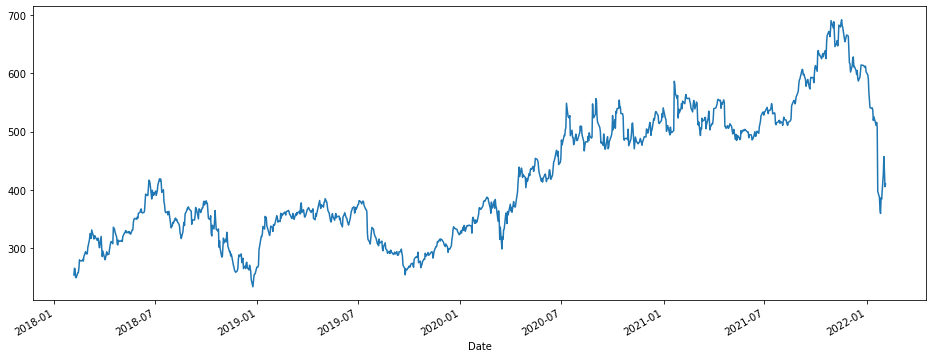

In [19]:
data['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

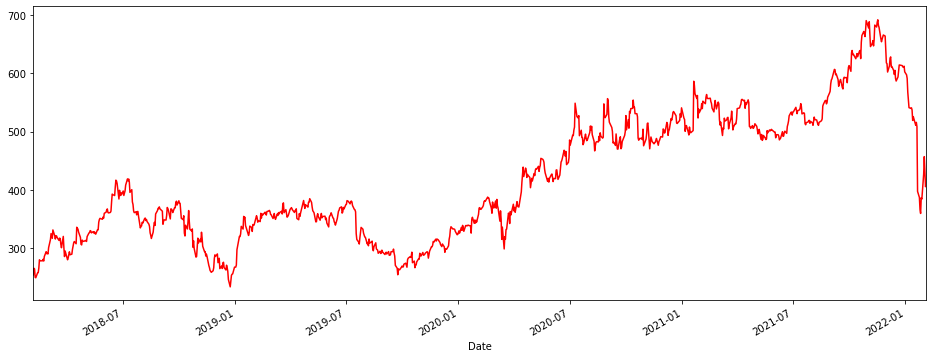

In [31]:
# xlimit and ylimit
data['Close'].plot(xlim=['2018-02-05','2022-02-04'],figsize=(16,6),ls='-',c='red')

<AxesSubplot:xlabel='Date'>

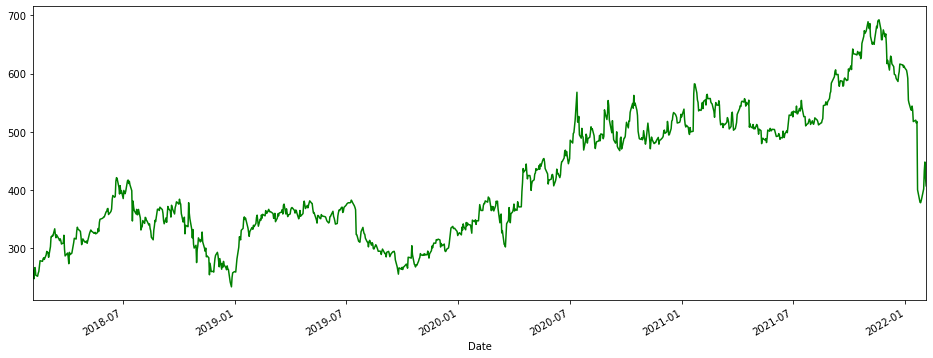

In [32]:
data['Open'].plot(xlim=['2018-02-05','2022-02-04'],figsize=(16,6),ls='-',c='green')

# Opening and Closing graph

<AxesSubplot:xlabel='Date'>

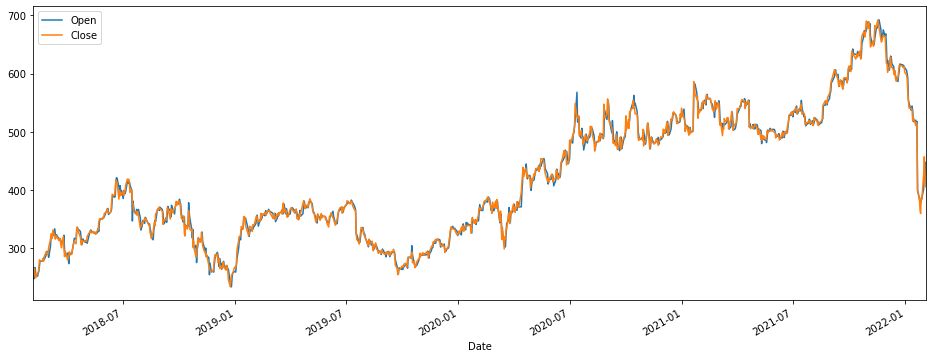

In [39]:
data[['Open','Close']].plot(xlim=['2018-02-05','2022-02-04'],figsize=(16,6))

In [44]:
df=data.reset_index()['Close']

In [45]:
df

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

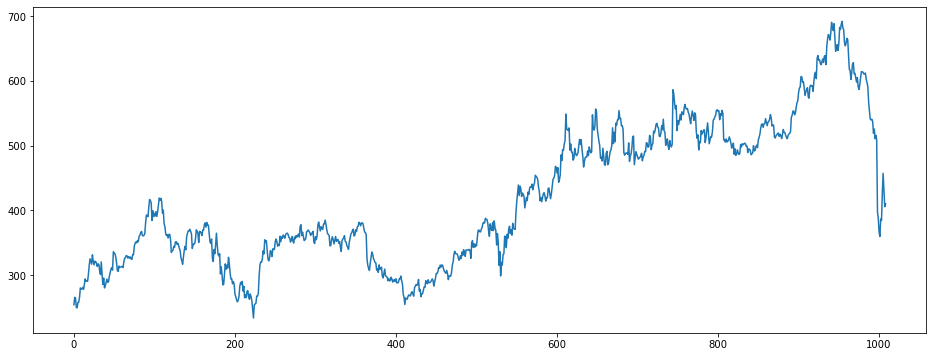

In [47]:
plt.figure(figsize=(16,6))
plt.plot(df)

# LSTM are sensitive to the scale the data. so we apply MinMax scaler

Scaling the data using MinMax scaler

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [49]:
df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

# Spliting dataset into train and test split

In [56]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size

In [79]:
y_training_data=df[:training_size,:]
y_test_data=df[training_size:len(df),:]

In [81]:
y_training_data.shape, y_test_data.shape

((655, 1), (354, 1))

# Converting array of values into dataset matrix

In [94]:
def create_dataset(dataset,timestep=1):
    x_data=[]
    y_data=[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(timestep+i),0]
        b=dataset[i+timestep,0]
        x_data.append(a)
        y_data.append(b)
    return np.array(x_data),np.array(y_data)

In [95]:
timestep=100
x_train,y_train=create_dataset(y_training_data,timestep)
x_test,y_test=create_dataset(y_test_data,timestep)

In [96]:
x_train

array([[0.04451626, 0.06954849, 0.06701469, ..., 0.32895744, 0.36152555,
        0.34186674],
       [0.06954849, 0.06701469, 0.03542955, ..., 0.36152555, 0.34186674,
        0.35285382],
       [0.06701469, 0.03542955, 0.03405342, ..., 0.34186674, 0.35285382,
        0.34413837],
       ...,
       [0.4212883 , 0.44841749, 0.41300974, ..., 0.70481201, 0.69670829,
        0.63753522],
       [0.44841749, 0.41300974, 0.44474779, ..., 0.69670829, 0.63753522,
        0.61634736],
       [0.41300974, 0.44474779, 0.4367532 , ..., 0.63753522, 0.61634736,
        0.59662302]])

In [97]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(554, 100) (253, 100)
(554,) (253,)


# reshape input to be [samples, time steps, features] which is required for LSTM

In [99]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [100]:
x_train

array([[[0.04451626],
        [0.06954849],
        [0.06701469],
        ...,
        [0.32895744],
        [0.36152555],
        [0.34186674]],

       [[0.06954849],
        [0.06701469],
        [0.03542955],
        ...,
        [0.36152555],
        [0.34186674],
        [0.35285382]],

       [[0.06701469],
        [0.03542955],
        [0.03405342],
        ...,
        [0.34186674],
        [0.35285382],
        [0.34413837]],

       ...,

       [[0.4212883 ],
        [0.44841749],
        [0.41300974],
        ...,
        [0.70481201],
        [0.69670829],
        [0.63753522]],

       [[0.44841749],
        [0.41300974],
        [0.44474779],
        ...,
        [0.69670829],
        [0.63753522],
        [0.61634736]],

       [[0.41300974],
        [0.44474779],
        [0.4367532 ],
        ...,
        [0.63753522],
        [0.61634736],
        [0.59662302]]])

### Create the Stacked LSTM model

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [109]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 5s 176ms/step - loss: 0.0289 - val_loss: 0.0267
Epoch 2/100
9/9 [==============================] - 1s 73ms/step - loss: 0.0090 - val_loss: 0.0370
Epoch 3/100
9/9 [==============================] - 1s 72ms/step - loss: 0.0061 - val_loss: 0.0234
Epoch 4/100
9/9 [==============================] - 1s 81ms/step - loss: 0.0045 - val_loss: 0.0095
Epoch 5/100
9/9 [==============================] - 1s 78ms/step - loss: 0.0036 - val_loss: 0.0092
Epoch 6/100
9/9 [==============================] - 1s 73ms/step - loss: 0.0032 - val_loss: 0.0136
Epoch 7/100
9/9 [==============================] - 1s 72ms/step - loss: 0.0030 - val_loss: 0.0084
Epoch 8/100
9/9 [==============================] - 1s 71ms/step - loss: 0.0028 - val_loss: 0.0078
Epoch 9/100
9/9 [==============================] - 1s 73ms/step - loss: 0.0027 - val_loss: 0.0072
Epoch 10/100
9/9 [==============================] - 1s 71ms/step - loss: 0.0026 - val_loss: 0.0068
Epoch 11/100
9/9 [

9/9 [==============================] - 1s 69ms/step - loss: 7.4940e-04 - val_loss: 0.0015
Epoch 84/100
9/9 [==============================] - 1s 73ms/step - loss: 7.6752e-04 - val_loss: 0.0019
Epoch 85/100
9/9 [==============================] - 1s 72ms/step - loss: 6.6775e-04 - val_loss: 0.0016
Epoch 86/100
9/9 [==============================] - 1s 72ms/step - loss: 6.7262e-04 - val_loss: 0.0019
Epoch 87/100
9/9 [==============================] - 1s 71ms/step - loss: 6.3310e-04 - val_loss: 0.0017
Epoch 88/100
9/9 [==============================] - 1s 73ms/step - loss: 6.6411e-04 - val_loss: 0.0018
Epoch 89/100
9/9 [==============================] - 1s 69ms/step - loss: 6.9467e-04 - val_loss: 0.0015
Epoch 90/100
9/9 [==============================] - 1s 72ms/step - loss: 6.1145e-04 - val_loss: 0.0014
Epoch 91/100
9/9 [==============================] - 1s 71ms/step - loss: 6.0617e-04 - val_loss: 0.0016
Epoch 92/100
9/9 [==============================] - 1s 72ms/step - loss: 6.0875e-04 - 

In [106]:
import tensorflow as tf

In [107]:
tf.__version__

'2.15.0'

# lets predict and check performance metrics

In [118]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

8/8 [==============================] - 0s 16ms/step


In [119]:
train_predict

array([[0.34523383],
       [0.35377315],
       [0.35886282],
       [0.36825854],
       [0.36549094],
       [0.3679391 ],
       [0.38231403],
       [0.40515068],
       [0.41282195],
       [0.41238773],
       [0.40212294],
       [0.3718787 ],
       [0.35853395],
       [0.33566216],
       [0.31841296],
       [0.30253044],
       [0.29321477],
       [0.29351363],
       [0.29162526],
       [0.29467714],
       [0.29763842],
       [0.2896637 ],
       [0.2599367 ],
       [0.23769987],
       [0.22977987],
       [0.23616621],
       [0.24410737],
       [0.25579837],
       [0.26486713],
       [0.26439622],
       [0.26116475],
       [0.25510377],
       [0.24630973],
       [0.23702715],
       [0.22242332],
       [0.20886989],
       [0.1975149 ],
       [0.20064983],
       [0.21772346],
       [0.23961297],
       [0.2498857 ],
       [0.2665454 ],
       [0.2849569 ],
       [0.29886797],
       [0.30328423],
       [0.30389133],
       [0.29964128],
       [0.291

# Transform_back to original form

In [120]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [121]:
train_predict

array([[391.93152],
       [395.84088],
       [398.171  ],
       [402.47244],
       [401.2054 ],
       [402.3262 ],
       [408.90717],
       [419.36203],
       [422.874  ],
       [422.67523],
       [417.97592],
       [404.1298 ],
       [398.02045],
       [387.5495 ],
       [379.65262],
       [372.38147],
       [368.11667],
       [368.25348],
       [367.38895],
       [368.78613],
       [370.14185],
       [366.49094],
       [352.88162],
       [342.70135],
       [339.07553],
       [341.99927],
       [345.6348 ],
       [350.98706],
       [355.13882],
       [354.92325],
       [353.44385],
       [350.66904],
       [346.64307],
       [342.3934 ],
       [335.7076 ],
       [329.50275],
       [324.30432],
       [325.7395 ],
       [333.55597],
       [343.5772 ],
       [348.28018],
       [355.90714],
       [364.33612],
       [370.70474],
       [372.72653],
       [373.0045 ],
       [371.05878],
       [367.40234],
       [355.27014],
       [348.0725 ],


### Calculate RMSE performance metrics

In [126]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

367.8701624319589
563.3903795431397


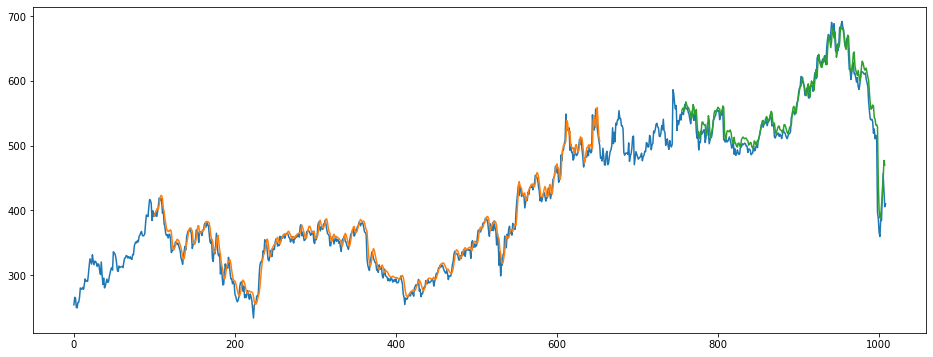

In [131]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [132]:
len(test_data)

354

In [134]:
x_input=test_data[254:].reshape(1,-1)
x_input.shape

(1, 100)

In [135]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [136]:
temp_input

[0.7623031220089325,
 0.770232186519946,
 0.7764574241046989,
 0.7460518342503559,
 0.741049807175792,
 0.779297134920363,
 0.7849981594001756,
 0.7830978186350088,
 0.7836438967059076,
 0.7644437065449226,
 0.797667144433283,
 0.8223062503372986,
 0.8284441613012656,
 0.8070377960750383,
 0.8757563085718285,
 0.8851269602135838,
 0.8692906961575151,
 0.8710599825542908,
 0.8587841584420446,
 0.8541971550699885,
 0.8647255577514177,
 0.8735501313222742,
 0.8615145487965392,
 0.8826586764115594,
 0.884908581408719,
 0.854634045922767,
 0.9158383843680022,
 0.9412202154248719,
 0.9562481616145222,
 0.9493895237067091,
 0.9371572940990189,
 0.9614687007370002,
 0.9969856403113886,
 0.9770209932746399,
 0.9694850896844873,
 0.9925732858122798,
 0.9491274149699269,
 0.8995870966094257,
 0.9121032955512327,
 0.9220200252638868,
 0.9021864325955293,
 0.9254931407712357,
 0.9801664073316425,
 0.9730019329394415,
 0.9906293483582447,
 1.0,
 0.9788777395352508,
 0.9718441840840797,
 0.9290317157

# demonstrate prediction for next 10 days

In [137]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.39277035]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0

11 day output [[0.6059063]]
12 day input [0.82844416 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998
 0.85878416 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868
 0.88490858 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952
 0.93715729 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329
 0.94912741 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314
 0.98016641 0.97300193 0.99062935 1.         0.97887774 0.97184418
 0.92903172 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314
 0.83853568 0.83569596 0.804373   0.82743933 0.85559515 0.86105593
 0.82374784 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265
 0.77073453 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857
 0.82311443 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929
 0.72877398 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921
 0.623228   0.63740416 0.60487972 0.61593233 0.59930975 0.35739716
 0.33478952 0.28950877 0.27483019 0.33380662 0.32869527 0.42214021
 0.48764772 0.4272515

22 day output [[0.6890886]]
23 day input [0.88265868 0.88490858 0.85463405 0.91583838 0.94122022 0.95624816
 0.94938952 0.93715729 0.9614687  0.99698564 0.97702099 0.96948509
 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003 0.90218643
 0.92549314 0.98016641 0.97300193 0.99062935 1.         0.97887774
 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869 0.93916696
 0.89124314 0.83853568 0.83569596 0.804373   0.82743933 0.85559515
 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991 0.81072929
 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499 0.83049742
 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013 0.79397565
 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397 0.67049655
 0.66258921 0.623228   0.63740416 0.60487972 0.61593233 0.59930975
 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662 0.32869527
 0.42214021 0.48764772 0.4272515  0.37509011 0.38507243 0.39277035
 0.38847244 0.39919156 0.4174701  0.44121426 0.46855071 0.49739361
 0.5256899  0.5516539

In [138]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [139]:
len(df)

1009

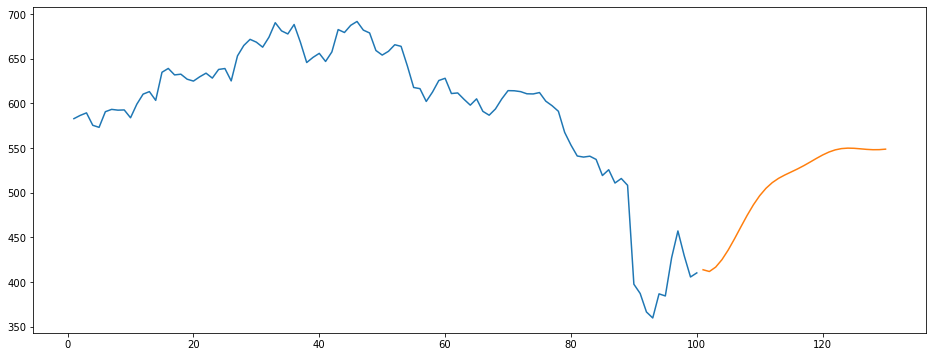

In [144]:
plt.figure(figsize=(16,6))
plt.plot(day_new,scaler.inverse_transform(df[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

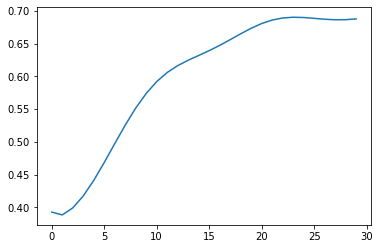

In [147]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1009:])

In [148]:
df3=scaler.inverse_transform(df3).tolist()

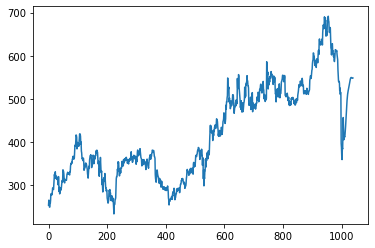

In [149]:
plt.plot(df3)